# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [391]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [392]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [393]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        loss = np.square(np.dot(X, w) - y).mean()
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = 2*np.dot(X.T, np.dot(X, w) - y)/y.size
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [394]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [395]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    n_weights = [w_init]
    for i in range(n_iterations):
      w = w - lr * loss.calc_grad(X, y, w)
      n_weights.append(w.copy())
    return n_weights

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [396]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [397]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [398]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    # plt.xlim(-1, 1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    # plt.ylim(-5, 5)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr=0.0001


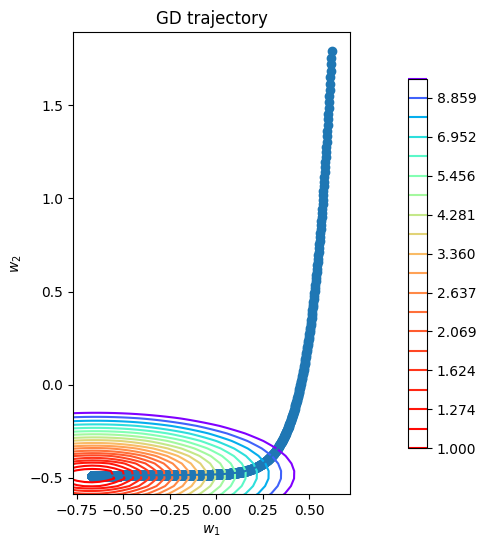

lr=0.001


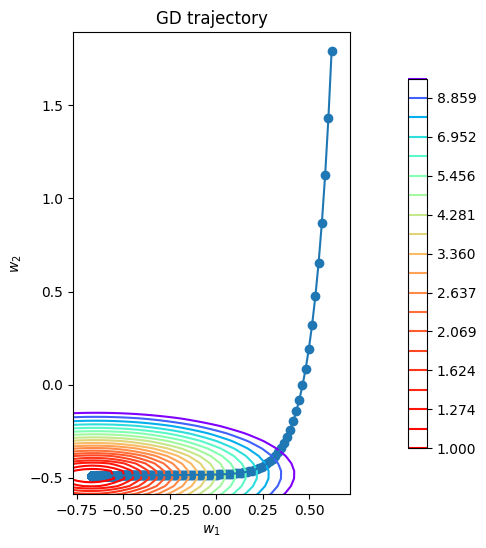

lr=0.005


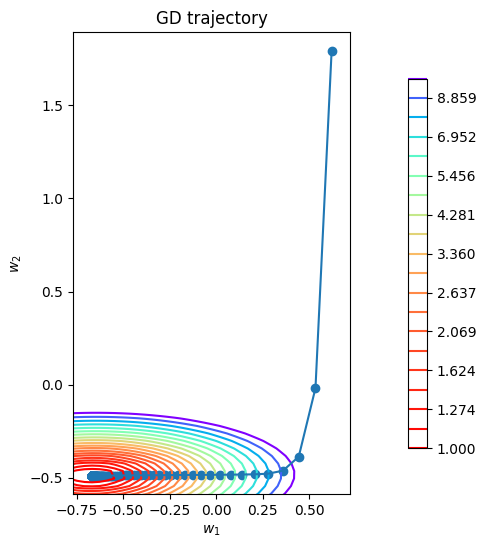

lr=0.01


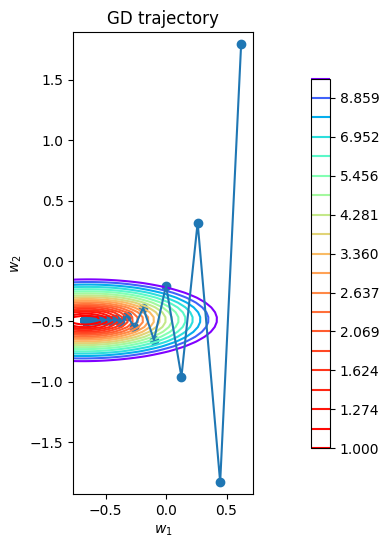

In [399]:
lr = [0.0001, 0.001,0.005, 0.01]

for i in lr:
  # np.random.seed(0)
  w_list = gradient_descent(w_init, X, y, loss, i)
  print(f'lr={i}')
  plot_gd(w_list, X, y, loss)

Ответ: при низком lr, а конкретно при 0.0001 нужно много итераций, очень плавно сходится. При 0.001, 0.001, 0.01 хорошее схождение. При 0.01 сходится быстрее. То есть с увеличением lr увеличивается скорость схождения, однако при слишком высоких lr сходится не будет.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [400]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    n_weights = [w_init]
    for i in range(n_iterations):
      sample = np.random.randint(n_objects, size=batch_size)
      w = w - lr * loss.calc_grad(X[sample], y[sample], w)
      n_weights.append(w.copy())
    return n_weights

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

batch size = 1
lr = 0.0001


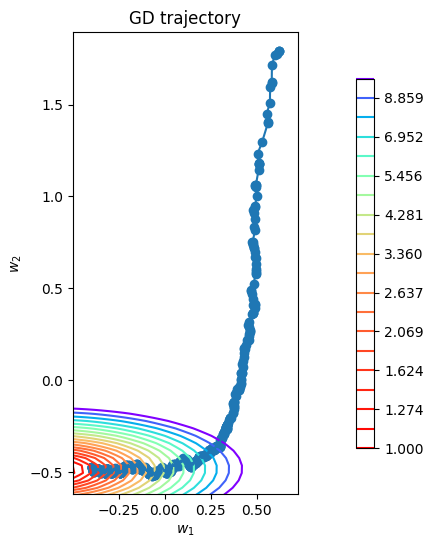

batch size = 10
lr = 0.0001


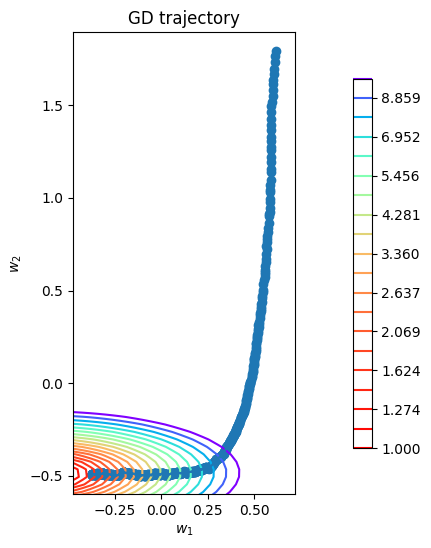

batch size = 50
lr = 0.0001


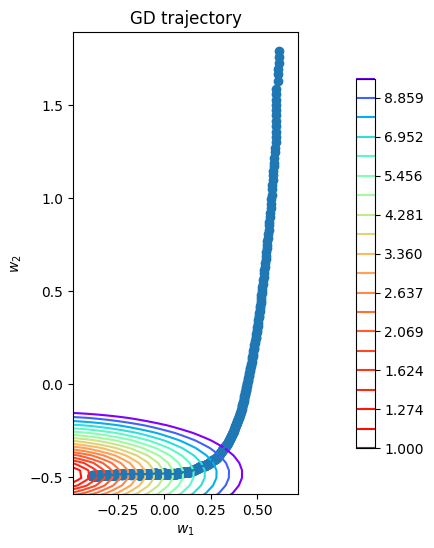

batch size = 100
lr = 0.0001


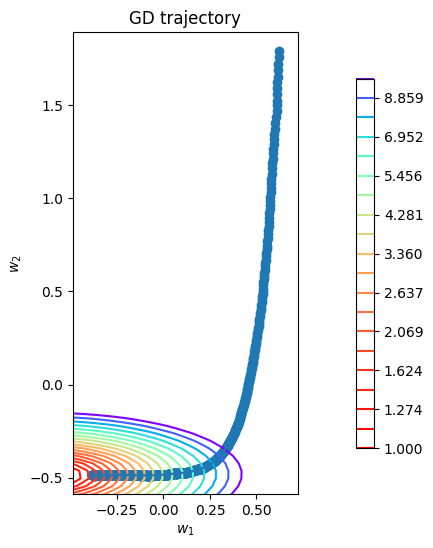

batch size = 1
lr = 0.001


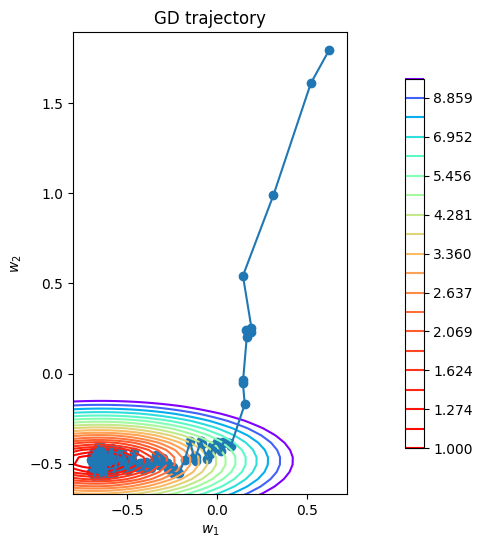

batch size = 10
lr = 0.001


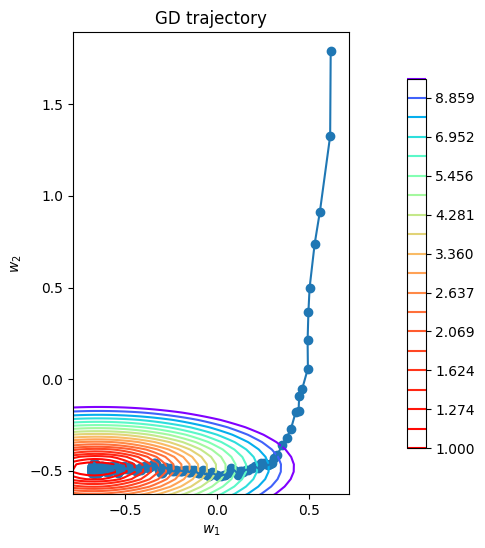

batch size = 50
lr = 0.001


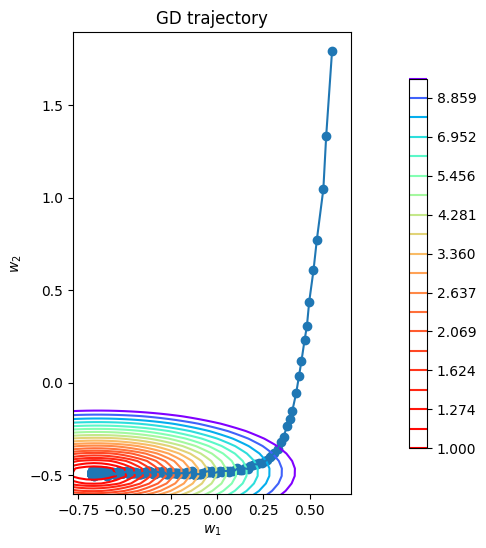

batch size = 100
lr = 0.001


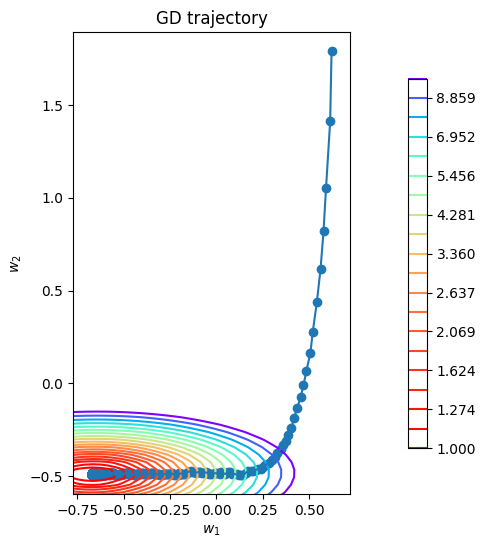

batch size = 1
lr = 0.005


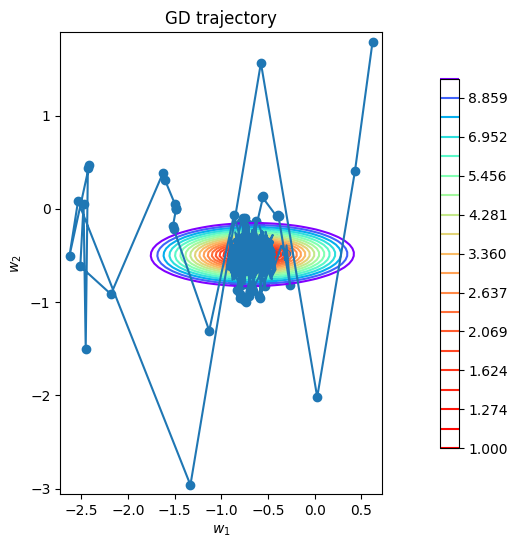

batch size = 10
lr = 0.005


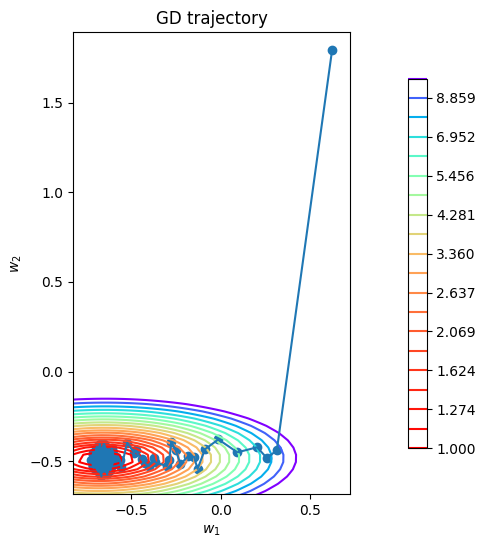

batch size = 50
lr = 0.005


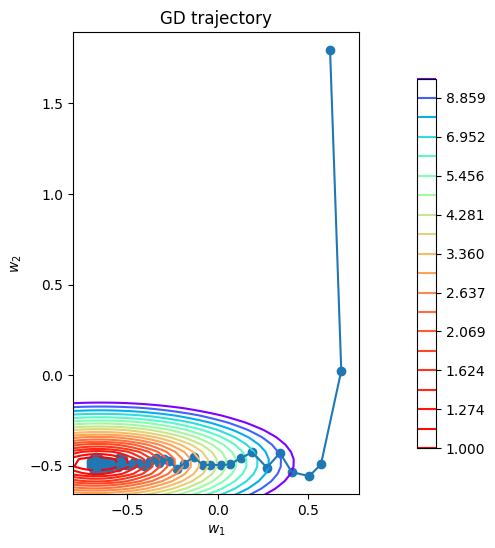

batch size = 100
lr = 0.005


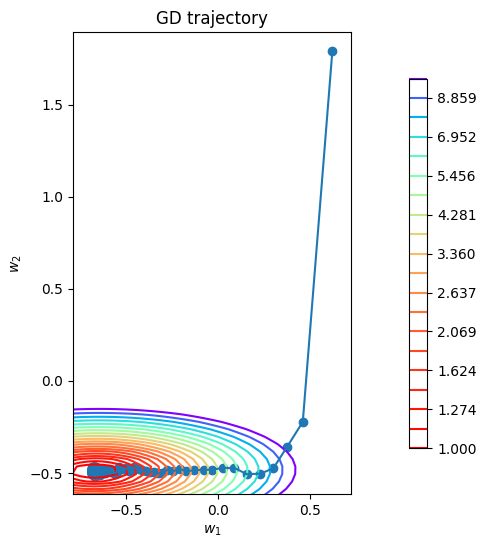

batch size = 1
lr = 0.01


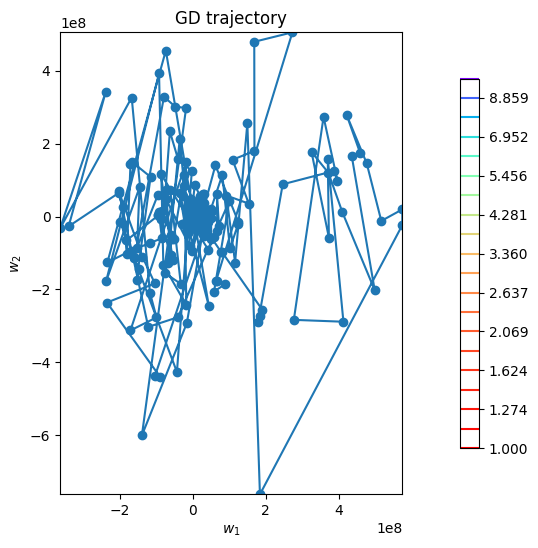

batch size = 10
lr = 0.01


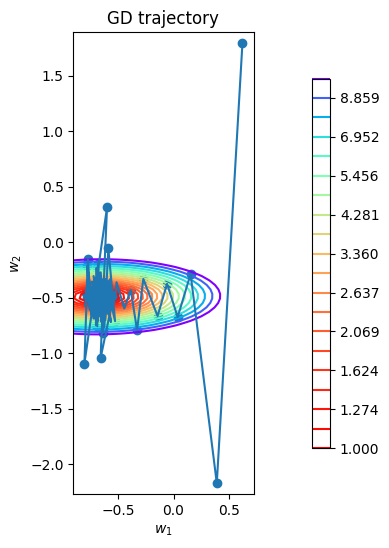

batch size = 50
lr = 0.01


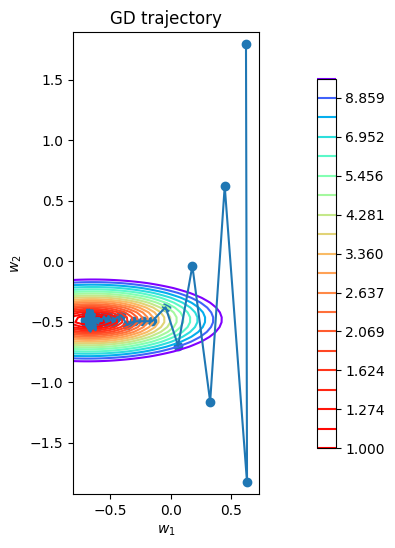

batch size = 100
lr = 0.01


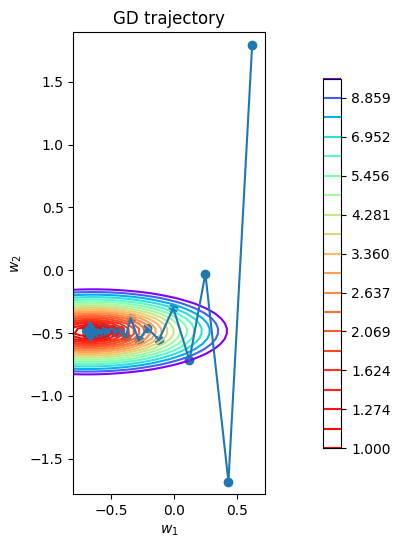

In [401]:
lr = [0.0001, 0.001,0.005, 0.01]
batch_size = [1, 10, 50, 100]

for i in lr:
  for j in batch_size:
    # np.random.seed(0)
    w_list = stochastic_gradient_descent(w_init=w_init, X=X, y=y, loss=loss, lr=i, batch_size=j)
    print(f'batch size = {j}')
    print(f'lr = {i}')
    plot_gd(w_list, X, y, loss)



Ответ: насчет lr также как и в прошлом, при маленьком lr нужно больше итераций. Для batch_size видно, что чем он меньше, тем хаотичнее сходится функция, очень хорошие результаты при batch_size = 100. В целом SGD работает быстрее, чем обычный градиентный спуск, так как не нужно проходить по всем объектам и считать по ним градиент.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [402]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    n_weights = [w_init]
    for i in range(n_iterations):
      sample = np.random.randint(n_objects, size=batch_size)
      n_t = lr * (1/(1+i+1))**p
      w = w - n_t * loss.calc_grad(X[sample], y[sample], w)
      n_weights.append(w.copy())
    return n_weights

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p=0.1


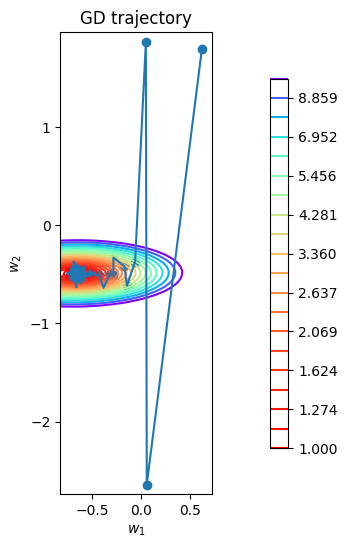

p=0.3


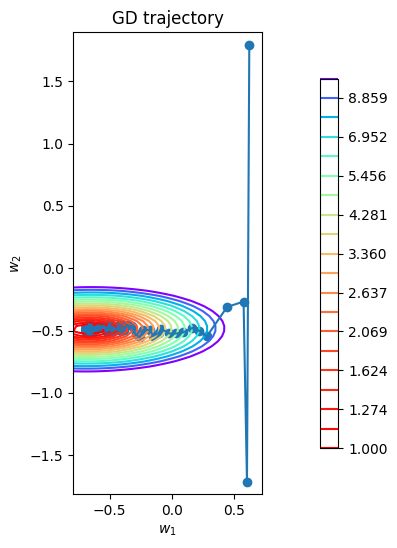

p=0.6


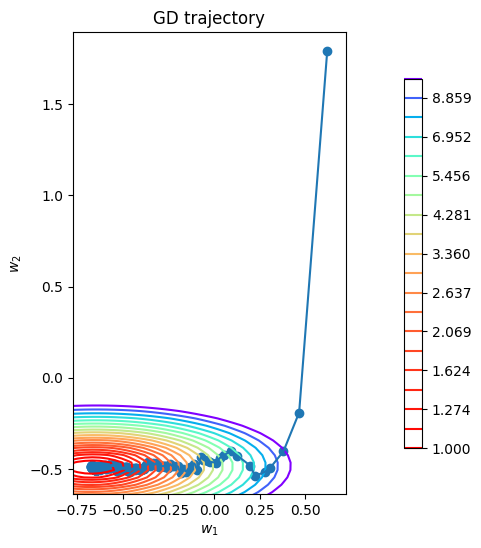

p=0.9


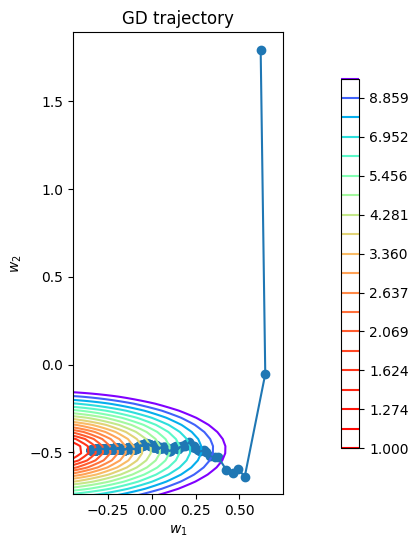

In [403]:
p = [0.1, 0.3, 0.6, 0.9]

for i in p:
  # np.random.seed(0)
  w_list = stochastic_gradient_descent(w_init=w_init, X=X, y=y, loss=loss, lr=0.01, batch_size=10,p=i)
  print(f'p={i}')
  plot_gd(w_list, X, y, loss)

Ответ: В зависимости от p меняется скорость уменьшения шага, чем больше p, тем медленнее уменьшается шаг

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

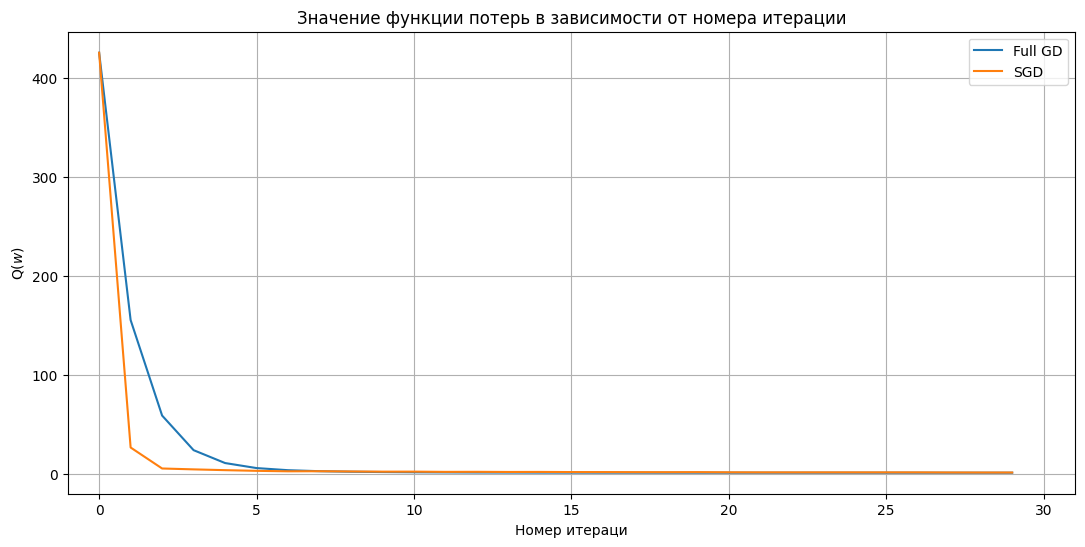

In [404]:
n_iterations = 30

w_list_gd = gradient_descent(w_init, X, y, loss, 0.01, n_iterations=n_iterations)
w_list_sgd = stochastic_gradient_descent(w_init=w_init, X=X, y=y, loss=loss, lr=0.01, batch_size=10,p=0.35, n_iterations=n_iterations)

gd_loss = []
sgd_loss = []

for n in range(n_iterations):
  gd_loss.append(loss.calc_loss(X, y, w_list_gd[n]))
  sgd_loss.append(loss.calc_loss(X, y, w_list_sgd[n]))

plt.figure(figsize=(13, 6))
plt.plot(range(n_iterations), gd_loss, label="Full GD")
plt.plot(range(n_iterations), sgd_loss, label="SGD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, n_iterations + 1))
plt.legend()
plt.xlabel("Номер итераци")
plt.ylabel(r"Q($w$)")
plt.grid()
plt.show()

Преимущество SGD видно, он быстрее сходится, что помогает экономить время и мощности. Еще можно поиграться с p и с другими параметрами, что тоже можеть увелчить скорость схождения.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [405]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        # Инициализируем случайные веса
        weights = np.random.randn(X.shape[1])
        # Получаем веса
        self.w = gradient_descent(weights, X, y, self.loss, self.lr)
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        pred = X.dot(self.w[-1])
        return pred

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [406]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [407]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [408]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [409]:
X_raw.isna().sum()

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64

Пропуски только в 1,5,18,19,21,22

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [410]:
# Разделяем на обучающую и тестовую

from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)

X_train[[1, 5, 18,19,21,22]].isna().sum()

1     26
5      1
18     3
19     3
21     1
22     1
dtype: int64

In [411]:
from sklearn.impute import SimpleImputer

# заполняем вещественные признаки с помощью самого частого значения на признаке
imp = SimpleImputer(strategy= 'most_frequent')
X_train[[1, 5, 18,19,21,22]] = imp.fit_transform(X_train[[1, 5, 18,19,21,22]])
X_test[[1, 5, 18,19,21,22]] = imp.transform(X_test[[1, 5, 18,19,21,22]])

# проверяем, что у нас нет пропусков на трейне и тесте
print(X_train.isna().sum().sum())
X_test.isna().sum().sum()

0


0

ссылка на источник: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [412]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['2','3','4','5','6','7','8','14','15','17']

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Создаем трейн только из вещественных признаков
X_train_numeric = X_train.drop(columns=categorical_columns)
X_test_numeric = X_test.drop(columns=categorical_columns)

# Отскейлим вещественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Закодируем категориальные признаки
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[categorical_columns]))
X_test_cat = pd.DataFrame(enc.transform(X_test[categorical_columns]))


# Конкатинируем соскейленые вещественные признаки и закодированные категориальные для теста и трейна
X_train_final = pd.concat([pd.DataFrame(X_train_scaled), X_train_cat], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_scaled), X_test_cat], axis=1)

X_train_final.columns = list(range(X_train_final.shape[1]))
X_test_final.columns = list(range(X_test_final.shape[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Здесь нужен OneHotEncoder, потому что в тесте есть новые значения для категориальных признаков, get_dummies не позволяет обойти эту проблему, а здесь она обходится с помощью handle_unknown='ignore' в аргументах кодировщика

Ссылка на источнии:
https://newtechaudit.ru/kategorialnye-priznaki-v-mashinnom-obuchenii/
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.026441,-0.641632,-0.287346,-0.270242,-0.074170,-0.283534,0.314722,-0.506876,-0.122416,0.033749,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.145206,0.182482,-0.435137,-0.860870,-2.024263,-0.870880,-0.521125,-1.443884,-1.123369,-1.516583,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.457803,-0.641632,2.136413,0.404761,0.209177,-0.479316,0.155513,0.426101,0.951777,-0.040077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.079397,-0.641632,-1.114972,-0.388368,-1.432568,-0.919826,1.747601,-1.067066,-0.805994,-1.479670,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.335512,0.182482,1.131440,-0.860870,-0.582528,-0.968771,-1.237564,-0.730549,-0.659513,-1.295107,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.121630,-0.641632,-0.730717,2.598521,2.050931,1.282721,1.906810,1.363108,-0.122416,0.513613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
136,-1.424898,-0.641632,-0.730717,0.792887,1.225892,0.548539,0.712744,1.363108,2.050385,1.104216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
137,-0.108704,0.182482,0.362931,-0.725869,-0.724201,-0.968771,-0.242509,-1.059005,-0.683927,-0.630679,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
138,1.339110,1.006597,0.185582,-0.253367,-0.215844,-0.136698,0.712744,-0.694278,-0.390965,-0.483028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [413]:
linear_regression.fit(X_train_final, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [414]:
from sklearn.metrics import mean_squared_error

pred_train = linear_regression.predict(X_train_final)
pred_test = linear_regression.predict(X_test_final)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

1178233.704672279
9620936.320676787


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [415]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        loss = np.square(np.dot(X, w) - y).mean() + self.coef * np.sum(np.square(w))
        return loss
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        pred = np.dot(X, w)
        grad = 2 * np.dot(X.T, pred - y)/y.size
        regul = 2 * self.coef * w[:-1]
        grad[:-1] += regul
        return grad
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
mse_dict = {}
for i in [0.0001, 0.001, 0.002, 0.003, 0.005, 0.007, 0.009, 0.01, 0.02, 0.04, 0.5]:
  linear_regression = LinearRegression(MSEL2Loss(i))
  linear_regression.fit(X_train_final, y_train)

  pred_train = linear_regression.predict(X_train_final)
  pred_test = linear_regression.predict(X_test_final)

  mse_dict[i] = mean_squared_error(y_test, pred_test)

print(mse_dict)

# выводим значение коэффа регуляриации, при котором лосс минимален
min(mse_dict, key=mse_dict.get)

{0.0001: 8053176.121957609, 0.001: 6417176.152527156, 0.002: 6055817.5256889425, 0.003: 6003132.864823554, 0.005: 6197125.317422779, 0.007: 6513678.542415863, 0.009: 6851652.975132795, 0.01: 7018241.116991723, 0.02: 8428517.11741476, 0.04: 10236725.918256747, 0.5: 20822694.660489086}


0.003

Получили,что минимальный mse на тестовой выборке при коэффициенте реугляриации 0,003, mse равен 6003132

In [416]:
linear_regression = LinearRegression(MSEL2Loss(0.003))
linear_regression.fit(X_train_final, y_train)

pred_train = linear_regression.predict(X_train_final)
pred_test = linear_regression.predict(X_test_final)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

1672829.110793767
6003132.864829514


Ответ: При регрессии без регулярации произошло переобучение и выдало 9 миллионов на тесте, при этом на трейне всего миллион. С регуляриацией mse на трейне и тесте находятся ближе, при этом на тесте уменьшилось на 3 миллиона, то есть убрали переобучение.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [417]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
        self.coef = 0.0001

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = np.dot(X, w) - y
        phi = lambda z: np.where(np.abs(z) <= self.eps, 0.5 * z**2, self.eps * (np.abs(z) - 0.5 * self.eps))
        loss = np.mean(phi(z))
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        der_phi = lambda z: z if np.abs(z) <= self.eps else self.eps * np.sign(z)
        pred = np.dot(X, w)
        # grad = (X.T @ np.array([der_phi(t) for t in (pred - y)])) / X.shape[0] + 2 * self.coef * w
        grad = (X.T @ np.array([der_phi(t) for t in (pred - y)])) / X.shape[0]
        return grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [418]:
huber_regression = LinearRegression(HuberLoss(70))
huber_regression.fit(X_train_final, y_train)

pred_train = huber_regression.predict(X_train_final)
pred_test = huber_regression.predict(X_test_final)

print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

2124221.268040727
5749492.902514667


Ответ: Результат получился сильно лучше, с помощью тестов на разных эпсилонах удалось достичь хорошего результата. Ошибка на трейне увеличилась, а на тесте уменьшилась. В MSELoss было сильное переобучение, здесь выбросы не так сильно влияют, поэтому переобучение выражено меньше.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

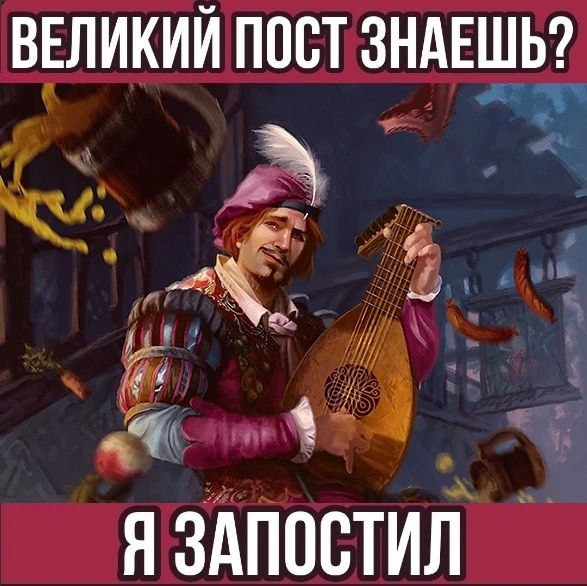

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [419]:
class SimulatedAnnealing:
    def __init__(self, loss, initial_temperature=10, cooling_rate=0.99, n_iterations=100):
        self.loss = loss
        self.initial_temperature = initial_temperature
        self.cooling_rate = cooling_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):

        X = np.asarray(X)
        y = np.asarray(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        np.random.seed(42)
        initial_weights = np.random.randn(X.shape[1])


        current_temperature = self.initial_temperature
        current_weights = initial_weights.copy()
        best_weights = current_weights.copy()
        best_loss = self.loss.calc_loss(X, y, current_weights)
        w_list = [current_weights.copy()]

        for _ in range(self.n_iterations):
            new_weights = current_weights + np.random.standard_t(1, size=current_weights.shape)
            new_loss = self.loss.calc_loss(X, y, new_weights)

            if (new_loss < best_loss) or (np.random.rand() < np.exp((best_loss - new_loss) / current_temperature)):
                best_loss = new_loss
                best_weights = new_weights.copy()

            current_temperature *= self.cooling_rate
            w_list.append(best_weights.copy())

        self.weights = np.array(w_list)

        return self

    def predict(self, X):
        assert hasattr(self, "weights"), "Linear regression must be fitted first"
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.weights[-1])

In [420]:

loss = MSELoss()
sa_regression = SimulatedAnnealing(loss=loss, initial_temperature=100, cooling_rate=0.5, n_iterations=100000)
sa_regression.fit(X_train_final, y_train)
pred_train_sa = sa_regression.predict(X_train_final)
pred_test_sa = sa_regression.predict(X_test_final)

print("MSE train", mean_squared_error(y_train, pred_train_sa))
print("MSE test:", mean_squared_error(y_test, pred_test_sa))

<ipython-input-419-199b5727be3c>:27: RuntimeWarning: overflow encountered in scalar divide
  if (new_loss < best_loss) or (np.random.rand() < np.exp((best_loss - new_loss) / current_temperature)):
<ipython-input-419-199b5727be3c>:27: RuntimeWarning: divide by zero encountered in scalar divide
  if (new_loss < best_loss) or (np.random.rand() < np.exp((best_loss - new_loss) / current_temperature)):


MSE train 47940695.46072486
MSE test: 96808940.68569727


MSE на трейне и тесте получилось довольно большим, сильно решет рандом, лучший результат с моим разбиением на трейн и тест получился при random.standard_t(1, size=current_weights.shape), тут параметр равен 1, от него ОЧЕНЬ сильно зависит MSE. Также многое решает количество итераций, в данном случае n_iterations равен 100к.

Теперь посмотрим на график с синтетическим набором данных, который мы использовали ранне для GD

In [421]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))


<ipython-input-419-199b5727be3c>:27: RuntimeWarning: overflow encountered in scalar divide
  if (new_loss < best_loss) or (np.random.rand() < np.exp((best_loss - new_loss) / current_temperature)):
<ipython-input-419-199b5727be3c>:27: RuntimeWarning: divide by zero encountered in scalar divide
  if (new_loss < best_loss) or (np.random.rand() < np.exp((best_loss - new_loss) / current_temperature)):


MSE train 0.9160466968827262


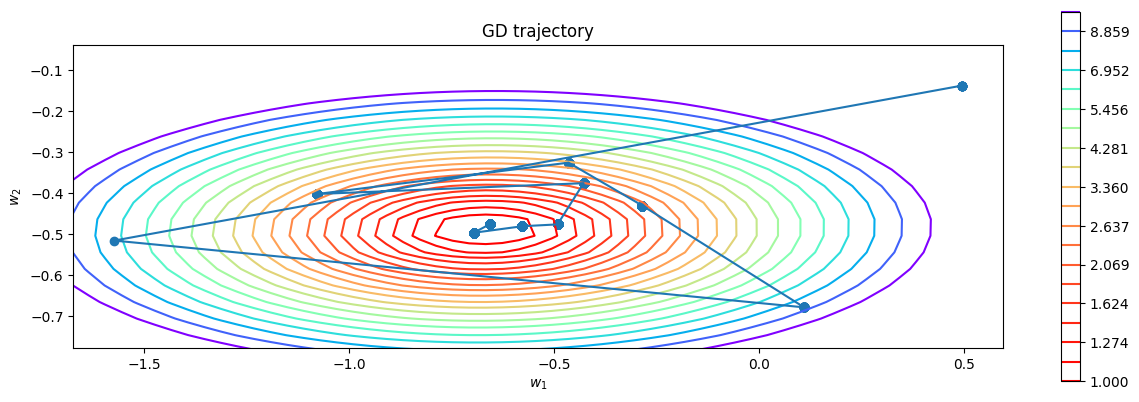

In [426]:
sa_regression_2 = SimulatedAnnealing(loss=loss, initial_temperature=30, cooling_rate=0.5, n_iterations=100000)
sa_regression_2.fit(X, y)
pred_train_sa_2 = sa_regression_2.predict(X)

print("MSE train", mean_squared_error(y, pred_train_sa_2))

w_list = sa_regression_2.weights
plot_gd(w_list, X, y, loss)

Если сравнивать с градиентным спуском, то траектория более хаотичная, особенно если выкрутить cooling rate к 1. В конечном счете, что GD, что отжиг сошлись, получились примерно одинаковые значение. loss в начале не такой большой как у gd, но это можно поменять, играясь с initial_temperature.